<a href="https://colab.research.google.com/github/pdpriya/titanic-survival-prediction/blob/main/GENDER%26AGE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/jangedoo/utkface-new")



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sec21ad016@sairamtap.edu.in
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new


100%|██████████| 331M/331M [00:15<00:00, 22.3MB/s]


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [3]:
BASE_DIR = '/content/utkface-new/UTKFace'


In [4]:
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [5]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/utkface-new/UTKFace/8_1_0_20170109205...,8,1
1,/content/utkface-new/UTKFace/10_0_0_2017011620...,10,0
2,/content/utkface-new/UTKFace/9_0_0_20170110224...,9,0
3,/content/utkface-new/UTKFace/59_0_0_2017011117...,59,0
4,/content/utkface-new/UTKFace/31_0_1_2017011602...,31,0


In [6]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

In [7]:
df.head()

,image,age,gender
0,/content/utkface-new/UTKFace/8_1_0_20170109205...,8,1
1,/content/utkface-new/UTKFace/10_0_0_2017011620...,10,0
2,/content/utkface-new/UTKFace/9_0_0_20170110224...,9,0
3,/content/utkface-new/UTKFace/59_0_0_2017011117...,59,0
4,/content/utkface-new/UTKFace/31_0_1_2017011602...,31,0


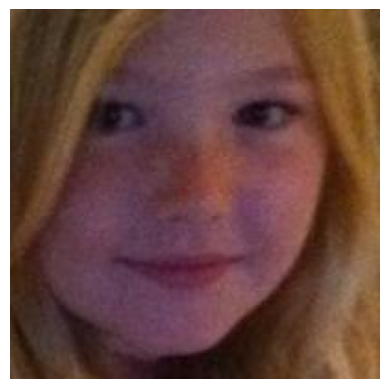

In [8]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

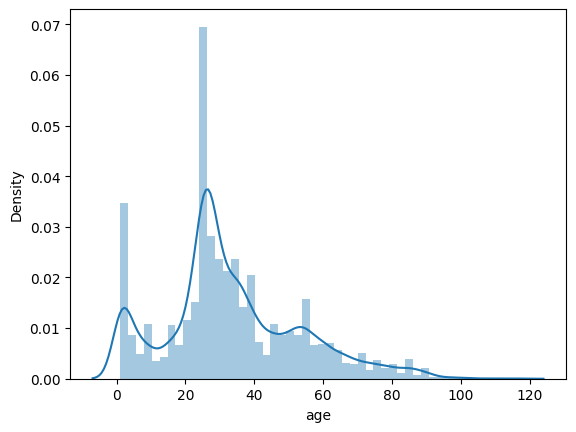

In [9]:
sns.distplot(df['age'])

<Axes: ylabel='count'>

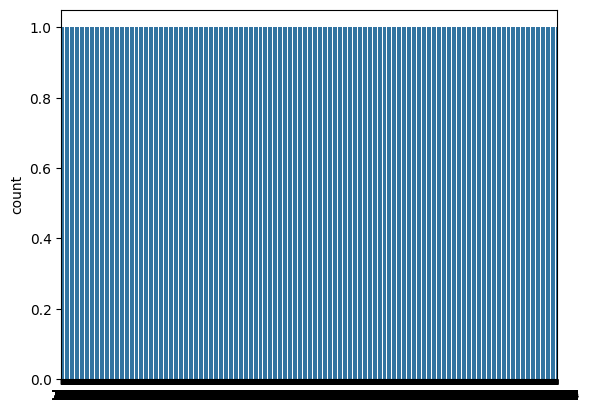

In [11]:
sns.countplot(df['gender'])

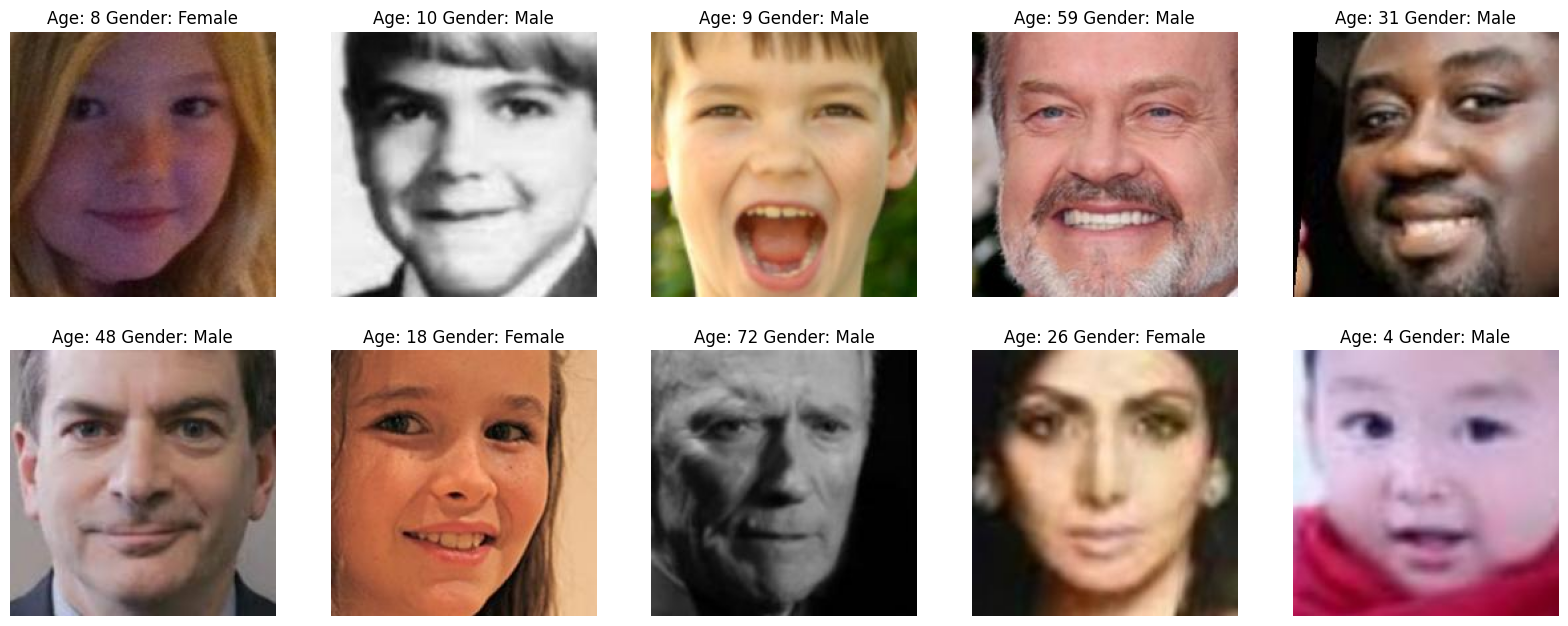

In [13]:
plt.figure(figsize=(20, 20))
files = df.iloc[0:10]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')